# LSSVMlib Examples using scikit-learn #

A simple **regression** example presenting the use of LSSVMlib in combination with the scikit-learn library.


## Example 1: Regression of a 1D dataset ##
A trivial example dealing with a dataset representing y=x². 

In [5]:
#Some imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

from LSSVMlib.LSSVMRegression import LSSVMRegression

The data needed for modeling is generated as numpy nd-arrays. The LSSVMRegression estimator checks if the features are provided as a 2D array, while the targets are presented as a 1D array. Failing to do so will raise an error.

In [6]:
x=np.array([[0,1,2,3]]).T  #create a column vector of 1 feature, 4 samples
y=(x*x).ravel()            #create the associated targets, needs to be a 1D array
ndata=x.shape[0]           #keep track of the number of rows

#print("x=",x,",\nx-dim=",x.ndim)
#print("y=",y,"\ny-dim=",y.ndim)

The regression model is created, making use of the usual scikit-learn coding pattern.

In [7]:
clf=LSSVMRegression(
        gamma=100,       #set the gamma-hyper parameter equal to 1
        kernel='rbf', #use the linear kernel
        sigma=1.0,
        c=0.01,
        d=2,
            )
clf.fit(x,y) # train our model, aka solve the set of linear equations
print("b = ",clf.intercept_)
print("a_i = ",clf.coef_)


b =  4.016004552939756
a_i =  [-4.39293879  1.70351971 -5.17000126  7.85942034]


With the parameters trained, the model is ready to perform some predictions. 

Mean squared error: 644.15
Coefficient of determination: -0.76


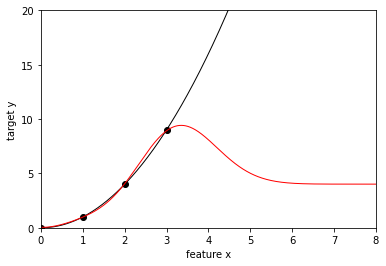

In [8]:
#generate a dens mesh
xPred=np.linspace((0,),(8,),801)
yExact=xPred**2
# and predict
yPred=clf.predict(xPred)


# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(yExact, yPred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(yExact, yPred))
# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(xPred, yExact,  color='black',linewidth=1)
plt.plot(xPred, yPred,   color='red'  ,linewidth=1)

plt.axis([0,8,0,20])
plt.xticks([0,1,2,3,4,5,6,7,8])
plt.yticks([0,5,10,15,20])
plt.xlabel("feature x")
plt.ylabel("target y")

plt.show()